In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
credit_data =pd.read_csv(r"C:\Users\btdjf\Desktop\Ironhack 2\Mid-bootcamp Project\Mid-bootcamp-Project\Files\german_credit_data.csv")
credit_data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,996,40,male,3,own,little,little,3857,30,car,good
997,997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [4]:
credit_data.shape

(1000, 11)

In [5]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
credit_data.isna().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [7]:
credit_data.duplicated().sum()

0

In [8]:
credit_data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [9]:
credit_data = credit_data.drop('Unnamed: 0', axis=1)

In [10]:
credit_data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [11]:
cols = []
for i in range(len(credit_data.columns)):
    cols.append(credit_data.columns[i].lower().replace(' ', '_'))
credit_data.columns = cols
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,NaN,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,NaN,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [12]:
credit_data['age'].unique()

array([67, 22, 49, 45, 53, 35, 61, 28, 25, 24, 60, 32, 44, 31, 48, 26, 36,
       39, 42, 34, 63, 27, 30, 57, 33, 37, 58, 23, 29, 52, 50, 46, 51, 41,
       40, 66, 47, 56, 54, 20, 21, 38, 70, 65, 74, 68, 43, 55, 64, 75, 19,
       62, 59], dtype=int64)

In [13]:
credit_data['sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
credit_data['job'].unique()

array([2, 1, 3, 0], dtype=int64)

In [15]:
credit_data['housing'].unique()

array(['own', 'free', 'rent'], dtype=object)

In [16]:
credit_data['saving_accounts'].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [17]:
credit_data['checking_account'].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

In [18]:
credit_data['credit_amount'].unique()

array([ 1169,  5951,  2096,  7882,  4870,  9055,  2835,  6948,  3059,
        5234,  1295,  4308,  1567,  1199,  1403,  1282,  2424,  8072,
       12579,  3430,  2134,  2647,  2241,  1804,  2069,  1374,   426,
         409,  2415,  6836,  1913,  4020,  5866,  1264,  1474,  4746,
        6110,  2100,  1225,   458,  2333,  1158,  6204,  6187,  6143,
        1393,  2299,  1352,  7228,  2073,  5965,  1262,  3378,  2225,
         783,  6468,  9566,  1961,  6229,  1391,  1537,  1953, 14421,
        3181,  5190,  2171,  1007,  1819,  2394,  8133,   730,  1164,
        5954,  1977,  1526,  3965,  4771,  9436,  3832,  5943,  1213,
        1568,  1755,  2315,  1412, 12612,  2249,  1108,   618,  1409,
         797,  3617,  1318, 15945,  2012,  2622,  2337,  7057,  1469,
        2323,   932,  1919,  2445, 11938,  6458,  6078,  7721,  1410,
        1449,   392,  6260,  7855,  1680,  3578,  7174,  2132,  4281,
        2366,  1835,  3868,  1768,   781,  1924,  2121,   701,   639,
        1860,  3499,

In [19]:
credit_data['duration'].unique()

array([ 6, 48, 12, 42, 24, 36, 30, 15,  9, 10,  7, 60, 18, 45, 11, 27,  8,
       54, 20, 14, 33, 21, 16,  4, 47, 13, 22, 39, 28,  5, 26, 72, 40],
      dtype=int64)

In [20]:
credit_data['purpose'].unique()

array(['radio/TV', 'education', 'furniture/equipment', 'car', 'business',
       'domestic appliances', 'repairs', 'vacation/others'], dtype=object)

In [21]:
credit_data['risk'].unique()

array(['good', 'bad'], dtype=object)

In [22]:
credit_data['age'].value_counts()

age
27    51
26    50
23    48
24    44
28    43
25    41
30    40
35    40
36    39
31    38
29    37
32    34
33    33
34    32
37    29
22    27
40    25
38    24
42    22
39    21
46    18
43    17
47    17
44    17
41    17
45    15
20    14
21    14
49    14
50    12
48    12
54    10
57     9
52     9
51     8
55     8
63     8
61     7
53     7
60     6
65     5
58     5
64     5
66     5
74     4
67     3
68     3
56     3
59     3
75     2
19     2
62     2
70     1
Name: count, dtype: int64

In [23]:
credit_data['sex'].value_counts()

sex
male      690
female    310
Name: count, dtype: int64

In [24]:
credit_data['job'].value_counts()

job
2    630
1    200
3    148
0     22
Name: count, dtype: int64

In [25]:
credit_data['housing'].value_counts()

housing
own     713
rent    179
free    108
Name: count, dtype: int64

In [26]:
credit_data['saving_accounts'].value_counts()

saving_accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64

In [27]:
credit_data['checking_account'].value_counts()

checking_account
little      274
moderate    269
rich         63
Name: count, dtype: int64

In [28]:
credit_data['credit_amount'].value_counts()

credit_amount
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     1
3758    1
1136    1
4576    1
Name: count, Length: 921, dtype: int64

In [29]:
credit_data['duration'].value_counts()

duration
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: count, dtype: int64

In [30]:
credit_data['purpose'].value_counts()

purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64

In [31]:
credit_data['risk'].value_counts()

risk
good    700
bad     300
Name: count, dtype: int64

In [32]:
credit_data.nunique()

age                  53
sex                   2
job                   4
housing               3
saving_accounts       4
checking_account      3
credit_amount       921
duration             33
purpose               8
risk                  2
dtype: int64

In [33]:
credit_data["saving_accounts"] = credit_data["saving_accounts"].fillna("none")

In [34]:
credit_data["checking_account"] = credit_data["checking_account"].fillna("none")

In [35]:
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,2,own,none,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,none,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,1,own,little,none,1736,12,furniture/equipment,good
996,40,male,3,own,little,little,3857,30,car,good
997,38,male,2,own,little,none,804,12,radio/TV,good
998,23,male,2,free,little,little,1845,45,radio/TV,bad


In [36]:
type_jobs = {0: 'unskilled/unemployed/non-resident', 1: 'unskilled-resident', 2: 'skilled employee/official', 3: 'highly skilled employe/employer'}
credit_data['job'] = credit_data['job'].map(type_jobs)

In [37]:
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,skilled employee/official,own,none,little,1169,6,radio/TV,good
1,22,female,skilled employee/official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled-resident,own,little,none,2096,12,education,good
3,45,male,skilled employee/official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee/official,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled-resident,own,little,none,1736,12,furniture/equipment,good
996,40,male,highly skilled employe/employer,own,little,little,3857,30,car,good
997,38,male,skilled employee/official,own,little,none,804,12,radio/TV,good
998,23,male,skilled employee/official,free,little,little,1845,45,radio/TV,bad


In [38]:
credit_data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1000.0,35.546,11.375469,19.0,27.0,33.0,42.00,75.0
credit_amount,1000.0,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
duration,1000.0,20.903,12.058814,4.0,12.0,18.0,24.00,72.0


In [39]:
numerical = credit_data.select_dtypes(include=['int64'])
numerical

,age,credit_amount,duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [40]:
categorical = credit_data.select_dtypes('object')
categorical

,sex,job,housing,saving_accounts,checking_account,purpose,risk
0,male,skilled employee/official,own,none,little,radio/TV,good
1,female,skilled employee/official,own,little,moderate,radio/TV,bad
2,male,unskilled-resident,own,little,none,education,good
3,male,skilled employee/official,free,little,little,furniture/equipment,good
4,male,skilled employee/official,free,little,little,car,bad
...,...,...,...,...,...,...,...
995,female,unskilled-resident,own,little,none,furniture/equipment,good
996,male,highly skilled employe/employer,own,little,little,car,good
997,male,skilled employee/official,own,little,none,radio/TV,good
998,male,skilled employee/official,free,little,little,radio/TV,bad


In [41]:
credit_data.groupby(['sex', 'risk']).size().unstack()

risk,bad,good
sex,,
female,109,201
male,191,499


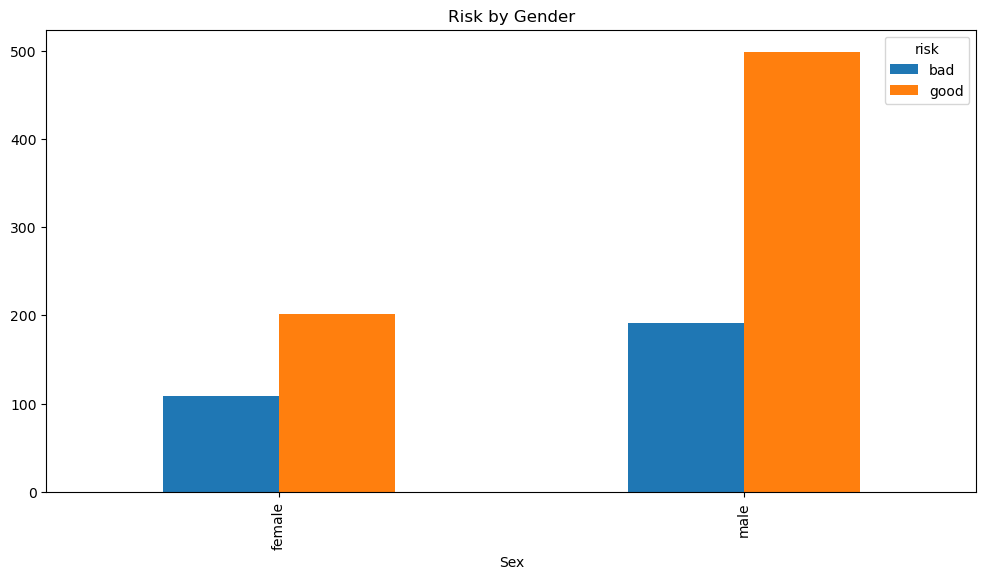

In [42]:
credit_data.groupby(['sex', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Risk by Gender')
plt.xlabel('Sex')
plt.show()

In [43]:
credit_data.groupby(['job', 'risk']).size().unstack()

risk,bad,good
job,,
highly skilled employe/employer,51,97
skilled employee/official,186,444
unskilled-resident,56,144
unskilled/unemployed/non-resident,7,15


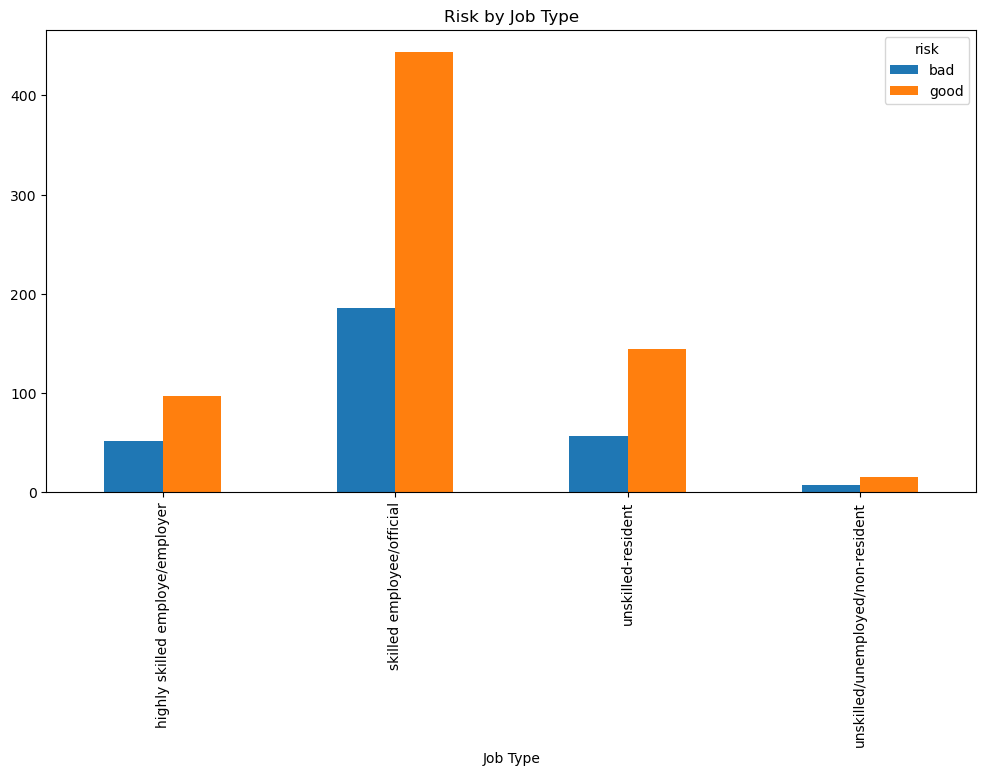

In [44]:
credit_data.groupby(['job', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Risk by Job Type')
plt.xlabel('Job Type')
plt.show()

In [45]:
credit_data.groupby(['housing', 'risk']).size().unstack()

risk,bad,good
housing,,
free,44,64
own,186,527
rent,70,109


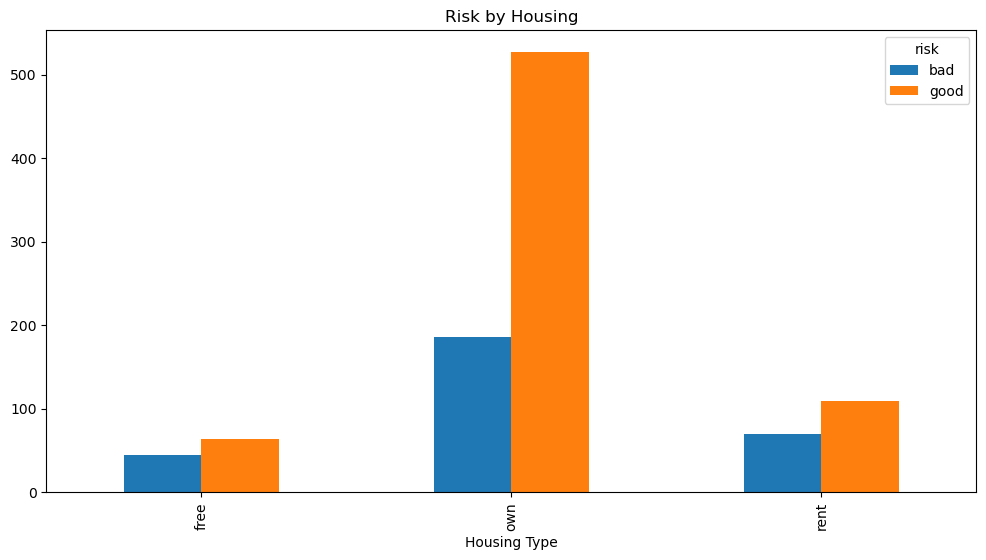

In [46]:
credit_data.groupby(['housing', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Risk by Housing')
plt.xlabel('Housing Type')
plt.show()

In [47]:
credit_data.groupby(['checking_account', 'risk']).size().unstack()

risk,bad,good
checking_account,,
little,135,139
moderate,105,164
none,46,348
rich,14,49


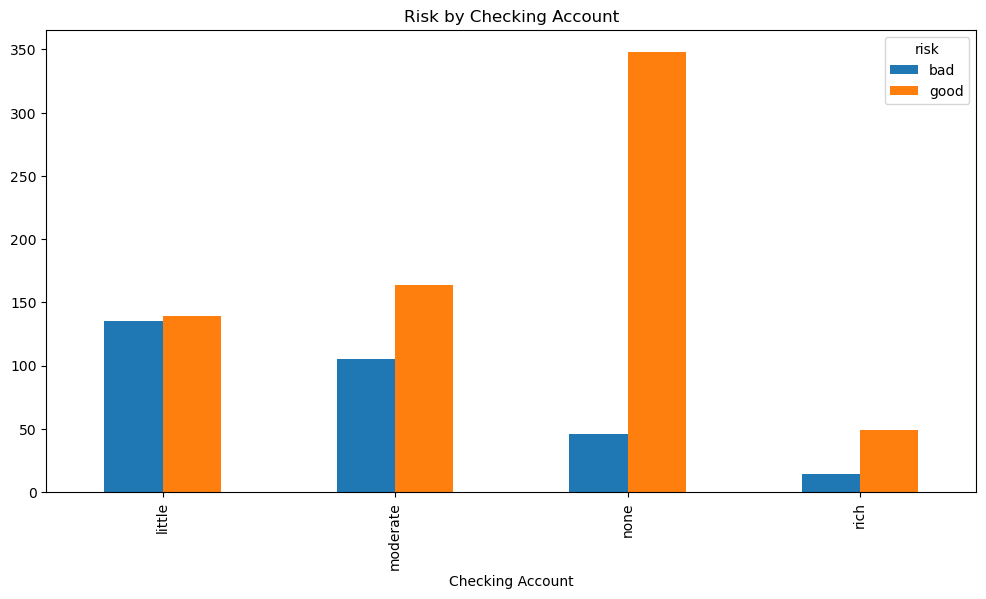

In [48]:
credit_data.groupby(['checking_account', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Risk by Checking Account')
plt.xlabel('Checking Account',)
plt.show()

In [49]:
credit_data.groupby(['saving_accounts', 'risk']).size().unstack()

risk,bad,good
saving_accounts,,
little,217,386
moderate,34,69
none,32,151
quite rich,11,52
rich,6,42


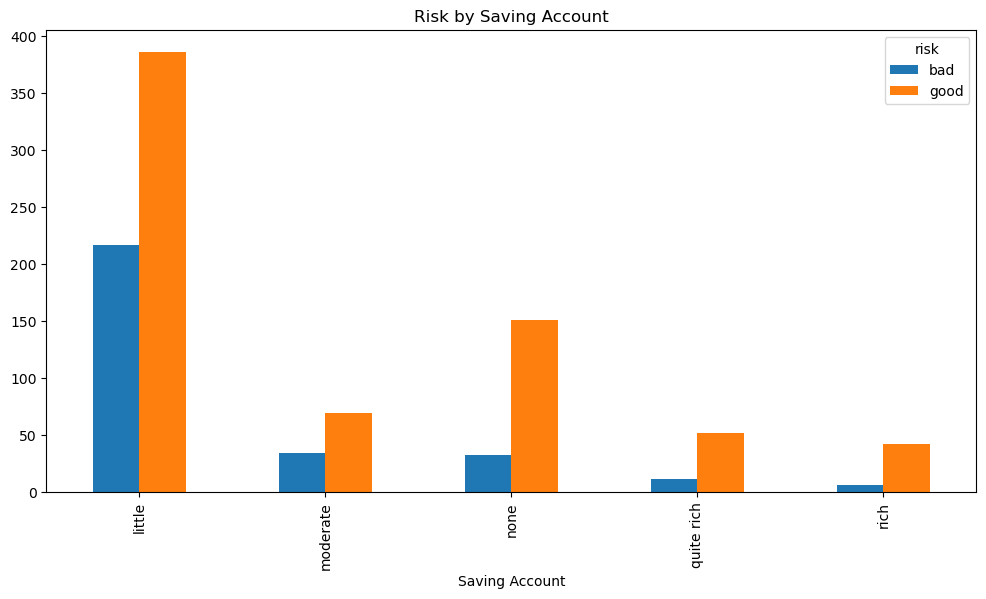

In [50]:
credit_data.groupby(['saving_accounts', 'risk']).size().unstack().plot(kind='bar', figsize=(12, 6))
plt.title('Risk by Saving Account')
plt.xlabel('Saving Account')
plt.show()

In [51]:
credit_data.groupby(['purpose', 'risk']).size().unstack()

risk,bad,good
purpose,,
business,34,63
car,106,231
domestic appliances,4,8
education,23,36
furniture/equipment,58,123
radio/TV,62,218
repairs,8,14
vacation/others,5,7


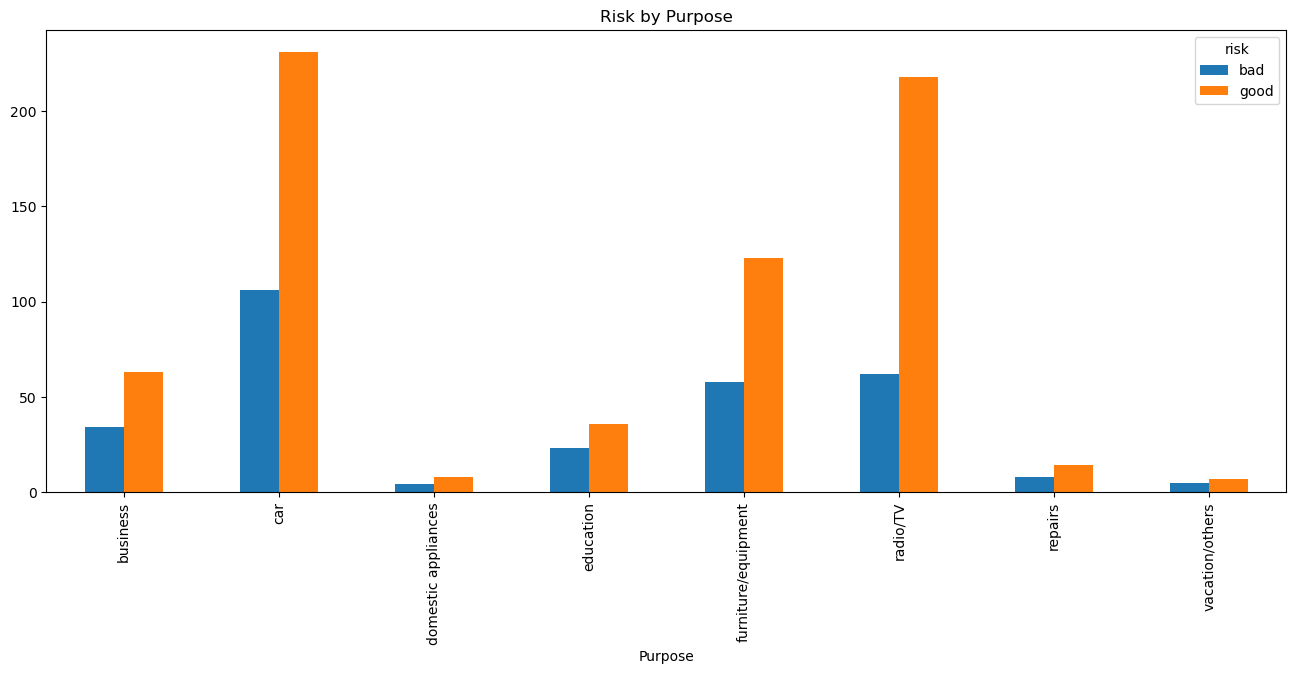

In [52]:
credit_data.groupby(['purpose', 'risk']).size().unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Risk by Purpose')
plt.xlabel('Purpose')
plt.show()

In [53]:
credit_data.groupby(['age', 'risk']).size().unstack()

risk,bad,good
age,,
19,1.0,1.0
20,5.0,9.0
21,5.0,9.0
22,11.0,16.0
23,20.0,28.0
24,19.0,25.0
25,19.0,22.0
26,14.0,36.0
27,13.0,38.0


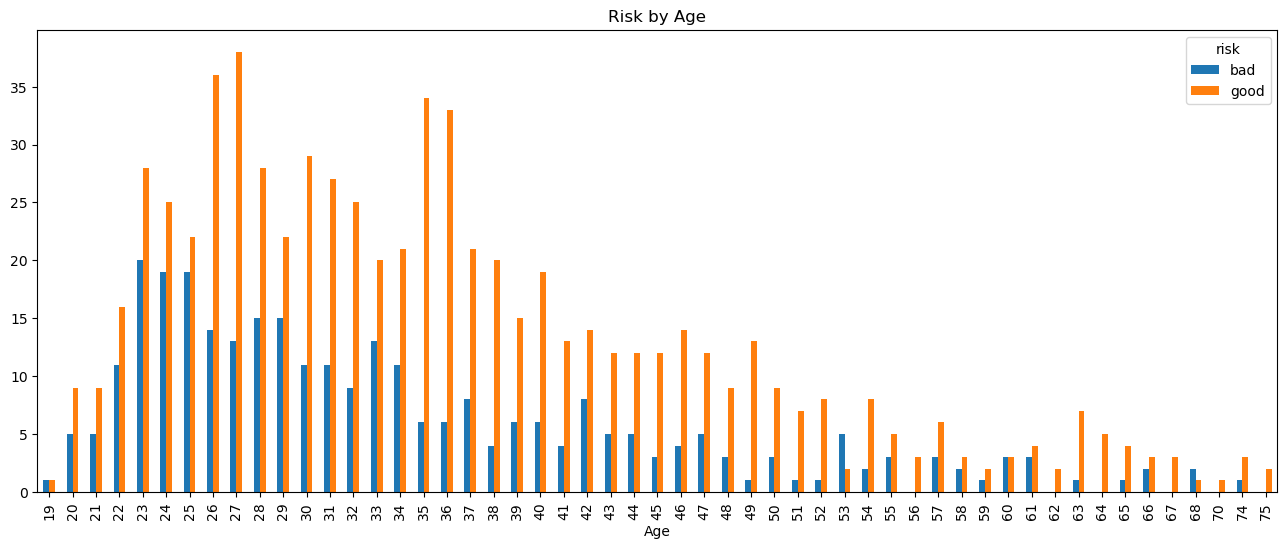

In [54]:
credit_data.groupby(['age', 'risk']).size().unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Risk by Age')
plt.xlabel('Age')
plt.show()

In [55]:
credit_data.groupby(['duration', 'risk']).size().unstack()

risk,bad,good
duration,,
4,NaN,6.0
5,NaN,1.0
6,9.0,66.0
7,NaN,5.0
8,1.0,6.0
9,14.0,35.0
10,3.0,25.0
11,NaN,9.0
12,49.0,130.0


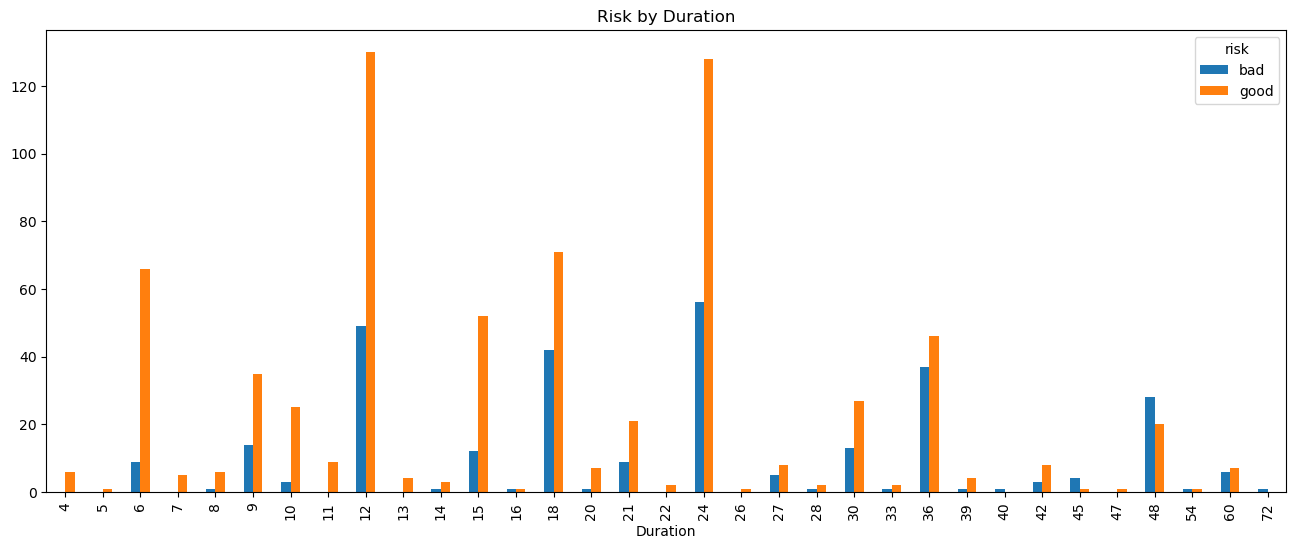

In [56]:
credit_data.groupby(['duration', 'risk']).size().unstack().plot(kind='bar', figsize=(16, 6))
plt.title('Risk by Duration')
plt.xlabel('Duration')
plt.show()

In [57]:
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,skilled employee/official,own,none,little,1169,6,radio/TV,good
1,22,female,skilled employee/official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled-resident,own,little,none,2096,12,education,good
3,45,male,skilled employee/official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee/official,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled-resident,own,little,none,1736,12,furniture/equipment,good
996,40,male,highly skilled employe/employer,own,little,little,3857,30,car,good
997,38,male,skilled employee/official,own,little,none,804,12,radio/TV,good
998,23,male,skilled employee/official,free,little,little,1845,45,radio/TV,bad


In [58]:
numerical

,age,credit_amount,duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24
...,...,...,...
995,31,1736,12
996,40,3857,30
997,38,804,12
998,23,1845,45


In [59]:
categorical

,sex,job,housing,saving_accounts,checking_account,purpose,risk
0,male,skilled employee/official,own,none,little,radio/TV,good
1,female,skilled employee/official,own,little,moderate,radio/TV,bad
2,male,unskilled-resident,own,little,none,education,good
3,male,skilled employee/official,free,little,little,furniture/equipment,good
4,male,skilled employee/official,free,little,little,car,bad
...,...,...,...,...,...,...,...
995,female,unskilled-resident,own,little,none,furniture/equipment,good
996,male,highly skilled employe/employer,own,little,little,car,good
997,male,skilled employee/official,own,little,none,radio/TV,good
998,male,skilled employee/official,free,little,little,radio/TV,bad


In [60]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

columns_to_scale = ['age', 'credit_amount', 'duration']


numerical[columns_to_scale] = min_max_scaler.fit_transform(numerical[columns_to_scale])

In [61]:
label_encoder = LabelEncoder()

categorical['sex_encoded'] = label_encoder.fit_transform(categorical['sex'])
categorical['housing_encoded'] = label_encoder.fit_transform(categorical['housing'])
categorical['saving_encoded'] = label_encoder.fit_transform(categorical['saving_accounts'])
categorical['checking_encoded'] = label_encoder.fit_transform(categorical['checking_account'])
categorical['purpose_encoded'] = label_encoder.fit_transform(categorical['purpose'])
categorical['risk_encoded'] = label_encoder.fit_transform(categorical['risk'])
categorical['job_encoded'] = label_encoder.fit_transform(categorical['job'])

In [62]:
columns_to_eliminate = ['sex', 'housing', 'saving_accounts', 'checking_account', 'purpose', 'job', 'risk']
categorical = categorical.drop(columns=columns_to_eliminate)
categorical

,sex_encoded,housing_encoded,saving_encoded,checking_encoded,purpose_encoded,risk_encoded,job_encoded
0,1,1,2,0,5,1,1
1,0,1,0,1,5,0,1
2,1,1,0,2,3,1,2
3,1,0,0,0,4,1,1
4,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...
995,0,1,0,2,4,1,2
996,1,1,0,0,1,1,0
997,1,1,0,2,5,1,1
998,1,0,0,0,5,0,1


In [63]:
numerical

,age,credit_amount,duration
0,0.857143,0.050567,0.029412
1,0.053571,0.313690,0.647059
2,0.535714,0.101574,0.117647
3,0.464286,0.419941,0.558824
4,0.607143,0.254209,0.294118
...,...,...,...
995,0.214286,0.081765,0.117647
996,0.375000,0.198470,0.382353
997,0.339286,0.030483,0.117647
998,0.071429,0.087763,0.602941


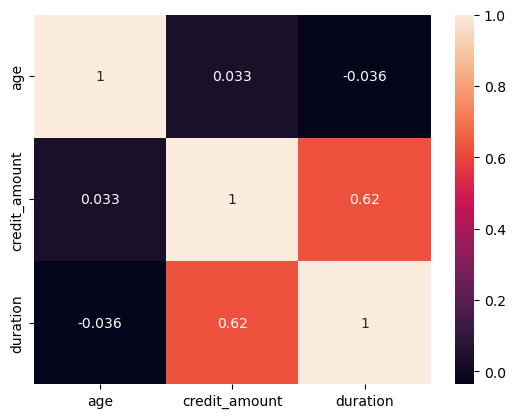

In [64]:
sns.heatmap(numerical.corr(),annot=True)
plt.show()

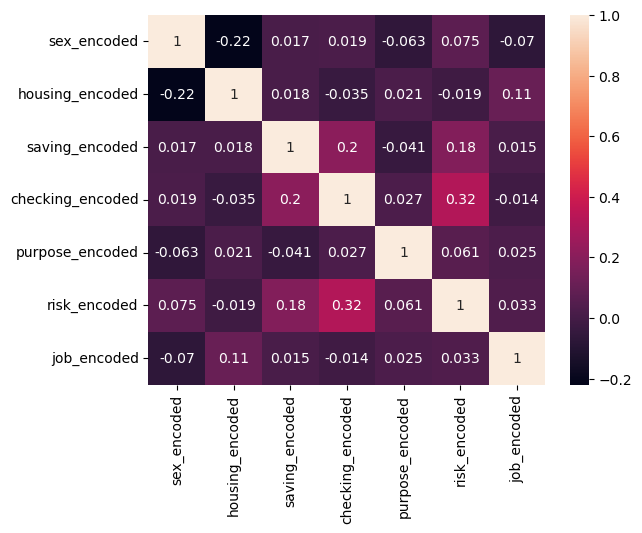

In [65]:
sns.heatmap(categorical.corr(),annot=True)
plt.show()

In [66]:
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,skilled employee/official,own,none,little,1169,6,radio/TV,good
1,22,female,skilled employee/official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled-resident,own,little,none,2096,12,education,good
3,45,male,skilled employee/official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee/official,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled-resident,own,little,none,1736,12,furniture/equipment,good
996,40,male,highly skilled employe/employer,own,little,little,3857,30,car,good
997,38,male,skilled employee/official,own,little,none,804,12,radio/TV,good
998,23,male,skilled employee/official,free,little,little,1845,45,radio/TV,bad


In [68]:
credit_data_2 = pd.concat([numerical, categorical], axis=1)
credit_data_2

,age,credit_amount,duration,sex_encoded,housing_encoded,saving_encoded,checking_encoded,purpose_encoded,risk_encoded,job_encoded
0,0.857143,0.050567,0.029412,1,1,2,0,5,1,1
1,0.053571,0.313690,0.647059,0,1,0,1,5,0,1
2,0.535714,0.101574,0.117647,1,1,0,2,3,1,2
3,0.464286,0.419941,0.558824,1,0,0,0,4,1,1
4,0.607143,0.254209,0.294118,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.081765,0.117647,0,1,0,2,4,1,2
996,0.375000,0.198470,0.382353,1,1,0,0,1,1,0
997,0.339286,0.030483,0.117647,1,1,0,2,5,1,1
998,0.071429,0.087763,0.602941,1,0,0,0,5,0,1


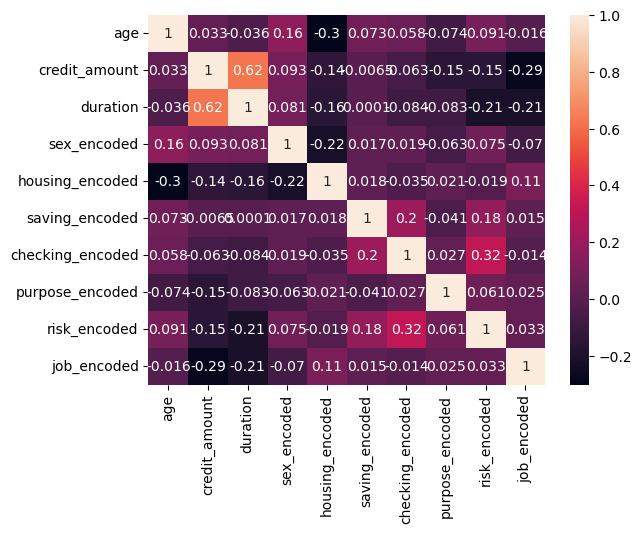

In [69]:
sns.heatmap(credit_data_2.corr(),annot=True)
plt.show()

In [70]:
X = credit_data_2.drop ('risk_encoded' , axis = 1)
y = credit_data_2['risk_encoded']

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size = 0.2)

LR = LogisticRegression()
LR.fit(X_train, y_train)

LR.score(X_test, y_test)

accuracy = LR.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.765


In [71]:
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score 
from sklearn.metrics import classification_report 

 

pred = LR.predict(X_test)  
pred

print("Precison is: ",precision_score(y_test, pred))
print("Recall is: ",recall_score(y_test, pred))
print("F1 is: ",f1_score(y_test, pred))

print(classification_report(y_test, pred))

Precison is:  0.7732558139534884
Recall is:  0.9432624113475178
F1 is:  0.8498402555910545
              precision    recall  f1-score   support

           0       0.71      0.34      0.46        59
           1       0.77      0.94      0.85       141

    accuracy                           0.77       200
   macro avg       0.74      0.64      0.65       200
weighted avg       0.76      0.77      0.73       200



In [70]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, pred)

array([[ 20,  39],
       [  8, 133]], dtype=int64)

In [71]:
predict_prob = LR.predict_proba(X_test)[0:,1]
predict_prob


threshold = 0.6 
costum_pred = (predict_prob >= threshold).astype(int)
costum_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1])

In [72]:
credit_data

,age,sex,job,housing,saving_accounts,checking_account,credit_amount,duration,purpose,risk
0,67,male,skilled employee/official,own,none,little,1169,6,radio/TV,good
1,22,female,skilled employee/official,own,little,moderate,5951,48,radio/TV,bad
2,49,male,unskilled-resident,own,little,none,2096,12,education,good
3,45,male,skilled employee/official,free,little,little,7882,42,furniture/equipment,good
4,53,male,skilled employee/official,free,little,little,4870,24,car,bad
...,...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled-resident,own,little,none,1736,12,furniture/equipment,good
996,40,male,highly skilled employe/employer,own,little,little,3857,30,car,good
997,38,male,skilled employee/official,own,little,none,804,12,radio/TV,good
998,23,male,skilled employee/official,free,little,little,1845,45,radio/TV,bad


In [73]:
credit_data_2

,age,credit_amount,duration,sex_encoded,housing_encoded,saving_encoded,checking_encoded,purpose_encoded,risk_encoded,job_encoded
0,0.857143,0.050567,0.029412,1,1,2,0,5,1,1
1,0.053571,0.313690,0.647059,0,1,0,1,5,0,1
2,0.535714,0.101574,0.117647,1,1,0,2,3,1,2
3,0.464286,0.419941,0.558824,1,0,0,0,4,1,1
4,0.607143,0.254209,0.294118,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
995,0.214286,0.081765,0.117647,0,1,0,2,4,1,2
996,0.375000,0.198470,0.382353,1,1,0,0,1,1,0
997,0.339286,0.030483,0.117647,1,1,0,2,5,1,1
998,0.071429,0.087763,0.602941,1,0,0,0,5,0,1


In [74]:
from sklearn.neighbors import KNeighborsClassifier

In [75]:
model = KNeighborsClassifier(n_neighbors = 10)
model = model.fit(X_train, y_train)
pred = model.predict(X_test)
accuracy = model.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.74


In [76]:
print("precision: ",precision_score(y_test,pred))
print("recall: ",recall_score(y_test,pred))
print("f1: ",f1_score(y_test,pred))


print(classification_report(y_test, pred))

precision:  0.779874213836478
recall:  0.8794326241134752
f1:  0.8266666666666667
              precision    recall  f1-score   support

           0       0.59      0.41      0.48        59
           1       0.78      0.88      0.83       141

    accuracy                           0.74       200
   macro avg       0.68      0.64      0.65       200
weighted avg       0.72      0.74      0.72       200



In [81]:
from sklearn.metrics import confusion_matrix 

confusion_matrix(y_test, pred)

array([[ 24,  35],
       [ 17, 124]], dtype=int64)

In [77]:
credit_data.to_excel('output.xlsx', index=False)

In [78]:
credit_data_2.to_excel('output_2.xlsx', index=False)

In [79]:
categorical.to_excel('output_cat.xlsx', index=False)

In [80]:
numerical.to_excel('output_num.xlsx', index=False)